In [1]:
# Dependencies
import requests
import json
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.stats import linregress

# OpenWeatherMap API key
from config import api_key

# Import citipy for cities based on lat/long values
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

In [3]:
#Save config information
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build patrial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
# query_url


In [4]:
# Set lists to hold response info
city_data = []
cloudiness = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# Set initial counts
counter = 0
result_counter = 1

print("Beginning Data Retrieval\n------------------------------")

# Loop through data to create dataframe
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudiness.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if counter > 49:
            counter = 1
            result_counter += 1
            city_data.append(city)
        else:
            counter += 1
            city_data.append(city)
        print(f"Processing Record {counter} of Set {result_counter} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")


Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1 | woodward
Processing Record 2 of Set 1 | qaanaaq
Processing Record 3 of Set 1 | kodiak
Processing Record 4 of Set 1 | victoria
Processing Record 5 of Set 1 | nouadhibou
Processing Record 6 of Set 1 | tamayo
Processing Record 7 of Set 1 | sihora
City not found. Skipping...
Processing Record 8 of Set 1 | kiama
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | mahebourg
City not found. Skipping...
Processing Record 11 of Set 1 | bubaque
Processing Record 12 of Set 1 | butaritari
Processing Record 13 of Set 1 | vilyuysk
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | ribeira grande
Processing Record 16 of Set 1 | kapaa
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | atuona
Processing Record 19 of Set 1 | sitka
Processing Record 20 of Set 1 | saldanha
Processing Record 21 of Set 1 | hilo
City not found. Skipping...
Processing Record 22 

Processing Record 40 of Set 4 | buraydah
Processing Record 41 of Set 4 | viedma
Processing Record 42 of Set 4 | tasiilaq
Processing Record 43 of Set 4 | hovd
Processing Record 44 of Set 4 | dyersburg
Processing Record 45 of Set 4 | camacha
Processing Record 46 of Set 4 | kruisfontein
Processing Record 47 of Set 4 | ukiah
Processing Record 48 of Set 4 | klaksvik
Processing Record 49 of Set 4 | muscat
City not found. Skipping...
Processing Record 50 of Set 4 | ust-maya
City not found. Skipping...
Processing Record 1 of Set 5 | bilma
Processing Record 2 of Set 5 | pisco
Processing Record 3 of Set 5 | aginskoye
City not found. Skipping...
Processing Record 4 of Set 5 | kasungu
Processing Record 5 of Set 5 | zheleznodorozhnyy
Processing Record 6 of Set 5 | luderitz
City not found. Skipping...
Processing Record 7 of Set 5 | iralaya
City not found. Skipping...
Processing Record 8 of Set 5 | sisimiut
Processing Record 9 of Set 5 | moratuwa
Processing Record 10 of Set 5 | aklavik
Processing Rec

Processing Record 25 of Set 8 | stornoway
Processing Record 26 of Set 8 | esperance
Processing Record 27 of Set 8 | peniche
Processing Record 28 of Set 8 | yerbogachen
Processing Record 29 of Set 8 | provideniya
Processing Record 30 of Set 8 | haines junction
Processing Record 31 of Set 8 | ayer itam
Processing Record 32 of Set 8 | cidreira
Processing Record 33 of Set 8 | talas
City not found. Skipping...
Processing Record 34 of Set 8 | podor
Processing Record 35 of Set 8 | lunenburg
Processing Record 36 of Set 8 | ponta delgada
Processing Record 37 of Set 8 | batagay-alyta
Processing Record 38 of Set 8 | rio de oro
Processing Record 39 of Set 8 | aku
Processing Record 40 of Set 8 | oltu
Processing Record 41 of Set 8 | salalah
Processing Record 42 of Set 8 | pangnirtung
Processing Record 43 of Set 8 | senador jose porfirio
Processing Record 44 of Set 8 | ruteng
Processing Record 45 of Set 8 | lagoa
Processing Record 46 of Set 8 | banda aceh
Processing Record 47 of Set 8 | chapais
Proce

In [5]:
# Create dictionary of lists for DataFrame
weather_info={
    'City':city_data,
    'Lat':lats,
    'Lng':lngs,
    'Max Temp':max_temps,
    'Humidity':humidities,
    'Cloudiness':cloudiness,
    'Wind Speed':wind_speeds,
    'Country':countries,
    'Date':dates
}

In [6]:
# Get weather data into DataFrame
weather_df = pd.DataFrame(weather_info)
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,woodward,36.4337,-99.3904,-6.00,93,90,3.60,US,1612685801
1,qaanaaq,77.4840,-69.3632,-11.76,89,100,0.25,GL,1612685801
2,kodiak,57.7900,-152.4072,-3.00,63,1,2.57,US,1612685802
3,victoria,22.2855,114.1577,22.78,61,0,0.45,HK,1612685585
4,nouadhibou,20.9310,-17.0347,15.00,77,0,8.75,MR,1612685802


In [24]:
# Save .csv of retrieved data
weather_df.to_csv("Output/weather.csv", index=False, header=True)

In [8]:
# Check count on DataFrame (must be at least 500)
weather_df.count()

City          552
Lat           552
Lng           552
Max Temp      552
Humidity      552
Cloudiness    552
Wind Speed    552
Country       552
Date          552
dtype: int64

In [9]:
# Get all info on DataFrame
# Inspect to see if there are any humidities >100%
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,5.520000e+02
mean,22.274404,16.628015,9.669674,71.630435,55.344203,3.752264,1.612686e+09
std,31.806001,88.127846,17.765159,21.318116,40.100070,2.956897,8.491564e+01
min,-54.800000,-175.200000,-42.220000,9.000000,0.000000,0.140000,1.612686e+09
25%,-3.956700,-64.512200,-1.027500,62.000000,13.750000,1.555000,1.612686e+09
50%,26.255100,19.883350,15.000000,77.000000,74.000000,3.085000,1.612686e+09
75%,47.772350,92.412525,24.302500,88.000000,96.000000,4.985000,1.612686e+09
max,78.218600,179.316700,36.000000,100.000000,100.000000,20.060000,1.612686e+09


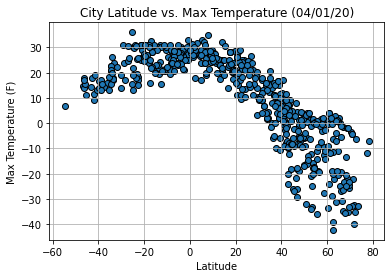

In [10]:
# Plot the data using a scatter plot
# Latitude vs. Max Temp
x_values = weather_df['Lat']
y_values = weather_df['Max Temp']
plt.scatter(x_values,y_values,edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature (04/01/20)')
plt.grid()
plt.savefig("Figures/lat_temp.png")
plt.show()


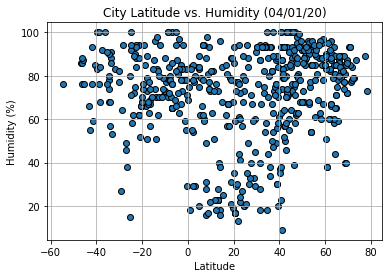

In [11]:
# Latitude vs. Humidity
x_values = weather_df['Lat']
y_values = weather_df['Humidity']
plt.scatter(x_values,y_values,edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (04/01/20)')
plt.grid()
plt.savefig("Figures/lat_humi.png")
plt.show()


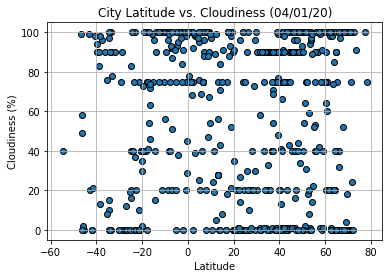

In [12]:
# Latitude vs. Cloudiness
x_values = weather_df['Lat']
y_values = weather_df['Cloudiness']
plt.scatter(x_values,y_values,edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (04/01/20)')
plt.grid()
plt.savefig("Figures/lat_cloud.png")
plt.show()


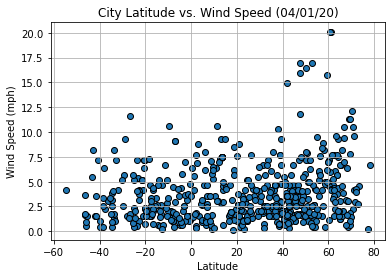

In [13]:
# Latitude vs. Humidity
x_values = weather_df['Lat']
y_values = weather_df['Wind Speed']
plt.scatter(x_values,y_values,edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed (04/01/20)')
plt.grid()
plt.savefig("Figures/lat_wind.png")
plt.show()


In [14]:
northern_hemi=weather_df.loc[weather_df['Lat']>0,:]
northern_hemi.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,woodward,36.4337,-99.3904,-6.00,93,90,3.60,US,1612685801
1,qaanaaq,77.4840,-69.3632,-11.76,89,100,0.25,GL,1612685801
2,kodiak,57.7900,-152.4072,-3.00,63,1,2.57,US,1612685802
3,victoria,22.2855,114.1577,22.78,61,0,0.45,HK,1612685585
4,nouadhibou,20.9310,-17.0347,15.00,77,0,8.75,MR,1612685802


The r-squared is: 0.7357111936460324


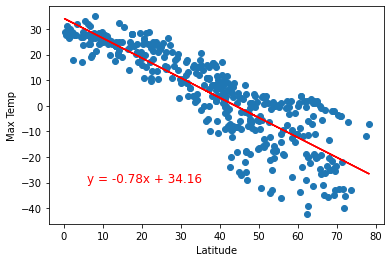

In [15]:
# Linear Regression
# Lat vs. Max Temp (NH)

x_values = northern_hemi['Lat']
y_values = northern_hemi['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,-30),fontsize=12,color='red')
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.savefig("Figures/lat_temp_NHregress.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [26]:
southern_hemi=weather_df.loc[weather_df['Lat']<0,:]
southern_hemi.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
7,kiama,-34.6833,150.8667,22.78,78,10,0.45,AU,1612685804
8,mataura,-46.1927,168.8643,17.85,76,49,1.62,NZ,1612685804
9,mahebourg,-20.4081,57.7000,31.00,66,40,7.20,MU,1612685767
13,rikitea,-23.1203,-134.9692,25.26,75,37,5.41,PF,1612685806
17,atuona,-9.8000,-139.0333,26.33,77,90,10.62,PF,1612685711


The r-squared is: 0.3892952958240571


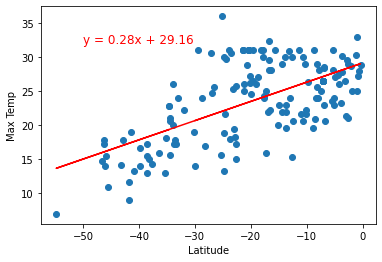

In [17]:
# Linear Regression
# Lat vs. Max Temp (SH)

x_values = southern_hemi['Lat']
y_values = southern_hemi['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,32),fontsize=12,color='red')
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.savefig("Figures/lat_temp_SHregress.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.12653563378612187


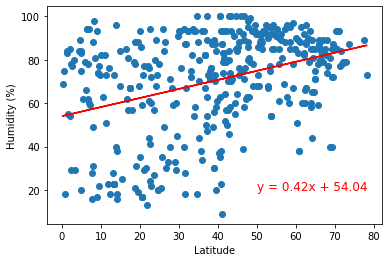

In [18]:
# Linear Regression
# Lat vs. Humidity (NH)
x_values = northern_hemi['Lat']
y_values = northern_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color='red')
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig("Figures/lat_humi_NHregress.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.003647677324767124


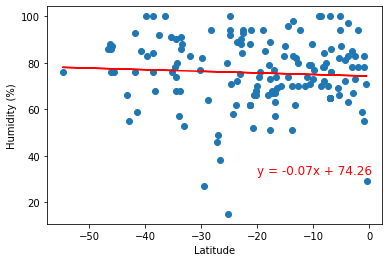

In [19]:
# Linear Regression
# Lat vs. Humidity (SH)

x_values = southern_hemi['Lat']
y_values = southern_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,32),fontsize=12,color='red')
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig("Figures/lat_humi_SHregress.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.0005545187307295928


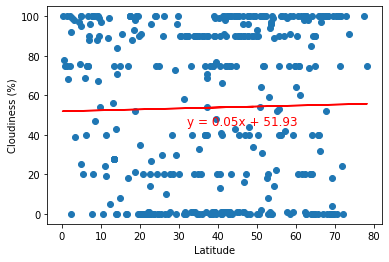

In [20]:
# Linear Regression
# Lat vs. Cloudiness (NH)
x_values = northern_hemi['Lat']
y_values = northern_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(32,45),fontsize=12,color='red')
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig("Figures/lat_cloud_NHregress.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.09066961015797091


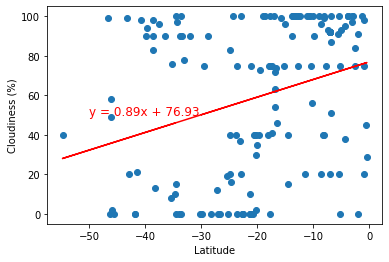

In [21]:
# Linear Regression
# Lat vs. Cloudiness (SH)
x_values = southern_hemi['Lat']
y_values = southern_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,50),fontsize=12,color='red')
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig("Figures/lat_cloud_SHregress.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.029872024945815652


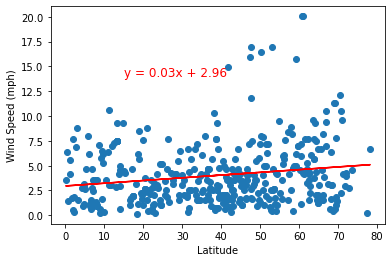

In [22]:
# Linear Regression
# Lat vs. Wind Speed (NH)
x_values = northern_hemi['Lat']
y_values = northern_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,14),fontsize=12,color='red')
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig("Figures/lat_wind_NHregress.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.006874360439668369


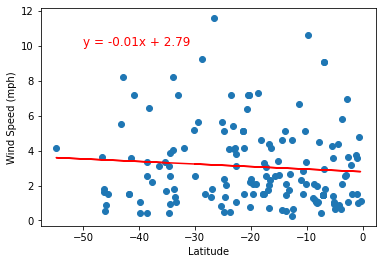

In [23]:
# Linear Regression
# Lat vs. Wind Speed (SH)
x_values = southern_hemi['Lat']
y_values = southern_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=12,color='red')
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig("Figures/lat_wind_SHregress.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()